In [1]:
import pandas as pd
#here we import the pandas date time module
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
sales=pd.read_excel('storesales.xlsx')

Now we have to extract the day, month and year from each date and create a separate column for each one of those.

In [3]:
#in this step we have converted the order date to a date time object
sales['Order Date']=pd.to_datetime(sales['Order Date'])
#here we have creeated a column containing the month. The month has been extracted from each date.
sales['Order Month']=sales['Order Date'].dt.month.values
#here we have created a column containing the day. The day has been extracted from each date
sales['Order Day']=sales['Order Date'].dt.day.values
#here we have created a column containing the year of order. The year has been extracted from each date.
sales['Order Year']=sales['Order Date'].dt.year.values

In [4]:
sales.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Ship Mode,Shipping Cost,Province,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship Date,Order Month,Order Day,Order Year
0,928,2011-03-01,Low,26,390.2000,Express Air,7.40,British Columbia,Consumer,Furniture,Office Furnishings,Small Box,2011-03-03,3,1,2011
1,32323,2010-07-23,High,38,259.7175,Regular Air,5.03,Ontario,Small Business,Technology,Telephones and Communication,Medium Box,2010-07-25,7,23,2010
2,48353,2012-12-15,Not Specified,18,71.2200,Regular Air,0.70,British Columbia,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,2012-12-17,12,15,2012
3,10144,2011-01-02,Critical,1,192.4900,Delivery Truck,30.00,British Columbia,Corporate,Furniture,Chairs & Chairmats,Jumbo Drum,2011-01-04,1,2,2011
4,26756,2012-05-10,Medium,25,767.2600,Regular Air,4.00,British Columbia,Home Office,Technology,Computer Peripherals,Small Box,2012-05-10,5,10,2012


In [5]:
sales['Order Year'].value_counts()

2009    2153
2010    2142
2012    2102
2011    2002
Name: Order Year, dtype: int64

#### 1) For each month of each year plot the variation of total sales and maximum sales:


In [6]:
maximum_sales=pd.DataFrame()
for year,df_year in sales.groupby('Order Year'):
    for month,df_month in df_year.groupby('Order Month'):
        maximum_sales=maximum_sales.append(df_month.sort_values(by='Sales',ascending='False').iloc[0,:])
maximum_sales.head()

,Customer Segment,Order Date,Order Day,Order ID,Order Month,Order Priority,Order Quantity,Order Year,Product Category,Product Container,Product Sub-Category,Province,Sales,Ship Date,Ship Mode,Shipping Cost
7507,Corporate,2009-01-28,28.0,19047.0,1.0,High,3.0,2009.0,Office Supplies,Wrap Bag,Pens & Art Supplies,Yukon,6.76,2009-01-30,Regular Air,1.57
5819,Home Office,2009-02-24,24.0,37441.0,2.0,Critical,1.0,2009.0,Office Supplies,Wrap Bag,Pens & Art Supplies,Ontario,3.77,2009-02-26,Regular Air,0.96
3020,Small Business,2009-03-02,2.0,21703.0,3.0,Not Specified,3.0,2009.0,Office Supplies,Small Box,Labels,New Brunswick,12.01,2009-03-04,Regular Air,0.50
1393,Corporate,2009-04-13,13.0,9635.0,4.0,Critical,1.0,2009.0,Office Supplies,Small Box,Binders and Binder Accessories,Quebec,3.42,2009-04-15,Regular Air,1.49
6060,Corporate,2009-05-18,18.0,59207.0,5.0,Critical,3.0,2009.0,Office Supplies,Wrap Bag,Rubber Bands,Saskachewan,10.12,2009-05-19,Regular Air,1.58


In [7]:
#variation of total sales:
total_sales=[]
month_count=[]
year_count=[]
for year,df_year in sales.groupby('Order Year'):
    for month,df_month in df_year.groupby('Order Month'):
        total_sales.append(df_month['Sales'].sum())
        month_count.append(month)
        year_count.append(year)
total_sales=pd.DataFrame(data={'Year':year_count,'Month':month_count,'Total_Sales':total_sales})

In [8]:
total_sales.head()

,Month,Total_Sales,Year
0,1,516302.9595,2009
1,2,332480.6365,2009
2,3,411628.7290,2009
3,4,393276.4820,2009
4,5,230145.5380,2009


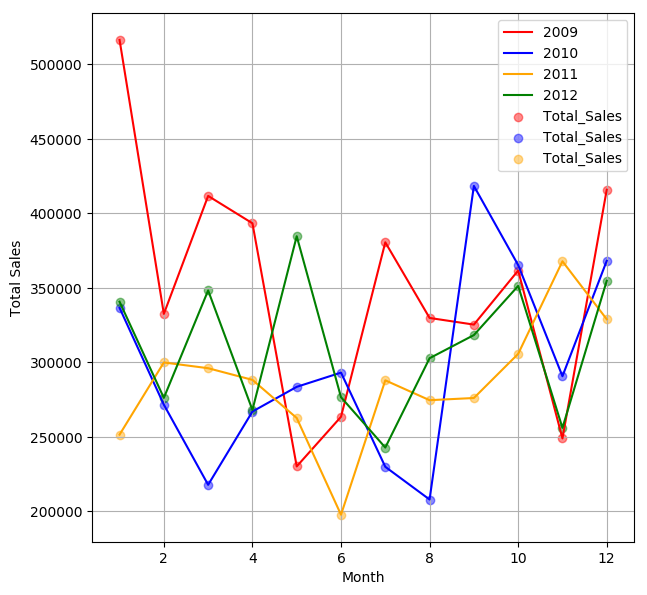

In [9]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(7,7),dpi=100)
ax.grid()
years=total_sales['Year'].unique()
years=years.tolist()
color=['red','blue','orange','green']
for count in range(len(years)):
    year_df=total_sales[total_sales['Year']==years[count]]
    ax.plot(year_df['Month'],year_df['Total_Sales'],label=years[count],color=color[count],alpha=2)
    ax.legend()
    ax.scatter(year_df['Month'],year_df['Total_Sales'],alpha=0.45,color=color[count])
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Sales')


#### 2) Plotting the monthly variation of maximum sales for each year :

In [10]:
maximum_sales=pd.DataFrame()
for year,df_year in sales.groupby('Order Year'):
    for month,df_month in df_year.groupby('Order Month'):
        maximum_sales=maximum_sales.append(df_month.sort_values(by='Sales',ascending=False).iloc[0,:])

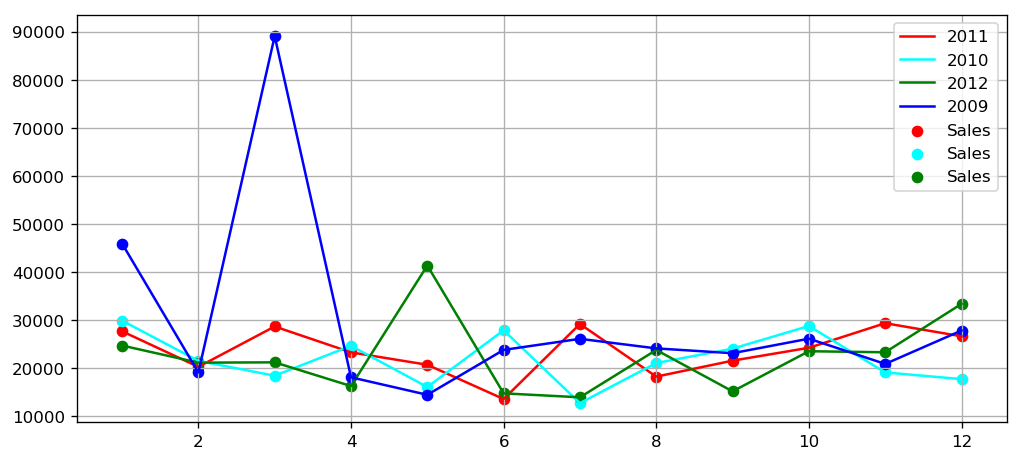

In [11]:
fig,ax=plt.subplots(nrows=1,ncols=1,dpi=120,figsize=(10,4.5))
ax.grid()
years=sales['Order Year'].unique().tolist()
colors=['red','cyan','green','blue']
for count in range(len(years)):
    ax.plot(maximum_sales[maximum_sales['Order Year']==years[count]]['Order Month'],maximum_sales[maximum_sales['Order Year']==years[count]]['Sales'],color=colors[count],
           label=years[count])
    ax.legend()
    ax.scatter(maximum_sales[maximum_sales['Order Year']==years[count]]['Order Month'],maximum_sales[maximum_sales['Order Year']==years[count]]['Sales'],color=colors[count])

#### 3) Plottling the monthly variation of averge sales :

In [12]:
years=[]
months=[]
days=[]
avg_sales=[]
for year,df_year in sales.groupby('Order Year'):
    for month,df_month in df_year.groupby('Order Month'):
            months.append(month)
            years.append(year)
            avg_sales.append(df_month['Sales'].mean())
avg_sales_df=pd.DataFrame(data={'Year':years,'Month':months,'Average':avg_sales})
avg_sales_df.head()

,Average,Month,Year
0,2315.259908,1,2009
1,2187.372609,2,2009
2,2225.020157,3,2009
3,2286.491174,4,2009
4,1264.535923,5,2009


Text(0,0.5,'avg_monthly_sales')

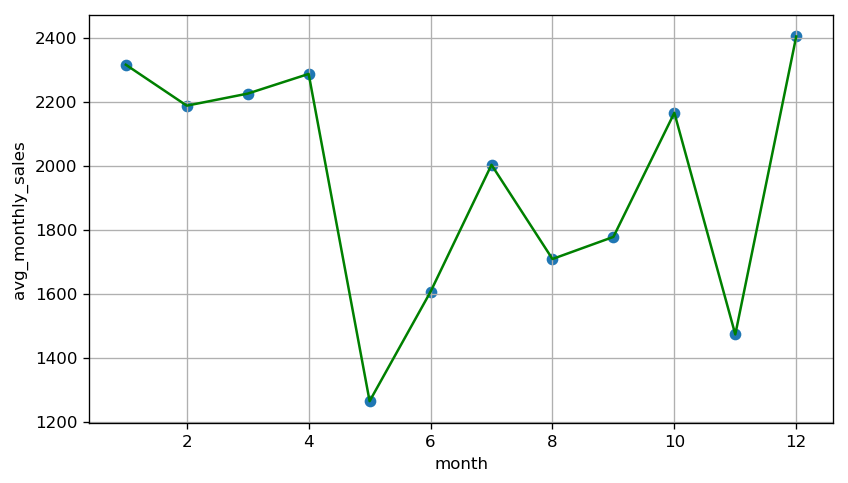

In [20]:
fig,ax=plt.subplots(nrows=1,ncols=1,dpi=120,figsize=(8,4.5))
ax.grid()
ax.plot(avg_sales_df[avg_sales_df['Year']==2009]['Month'],avg_sales_df[avg_sales_df['Year']==2009]['Average'],color='green')
ax.scatter(avg_sales_df[avg_sales_df['Year']==2009]['Month'],avg_sales_df[avg_sales_df['Year']==2009]['Average'])
ax.set_xlabel('month')
ax.set_ylabel('avg_monthly_sales')